# Script to run LRP on Toy Model with Image input

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

import keras
import keras.backend
from keras import layers
from keras import models
from keras import optimizers
import keras.utils
import pandas as pd

print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
#import h5py
import math
import time
import sklearn
from sklearn.utils import shuffle

import innvestigate
import innvestigate.utils as iutils

import os

1.13.1


In [3]:
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)
plt.style.context('default')

In [4]:
grid=16

In [5]:
# testing data : 1,000,000 samples
data_test = np.load('/mnt/users/lmhay/XAICoffea_updated/ToyModel/data/jetImagesTest1.npz')

In [7]:
import keras
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
    model1 = load_model('model/CNN2D_1mil_1.h5')
    model2 = load_model('model/CNN2D_1mil_2.h5')
    model3 = load_model('model/CNN2D_1mil_3.h5')
    model4 = load_model('model/CNN2D_1mil_4.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [8]:
model1.summary()#, model2.summary(), model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 16, 16, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        832       
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 16, 32)        9248      
_________________________________________________________________
conv3 (Conv2D)               (None, 16, 16, 32)        4128      
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
__________

In [8]:
results_model1 = model1.evaluate(data_test['jetImages'], data_test['labels'])
results_model2 = model2.evaluate(data_test['jetImages'], data_test['labels'])
results_model3 = model3.evaluate(data_test['jetImages'], data_test['labels'])
results_model4 = model4.evaluate(data_test['jetImages'], data_test['labels'])

1000000/1000000 [==============================] - 111s 111us/step


In [9]:
np.set_printoptions(precision=4, suppress=False)

In [10]:
print("Model 1: ", results_model1)
print("Model 2: ", results_model2)
print("Model 3: ", results_model3)
print("Model 4: ", results_model4)

Model 1:  [0.03451682311871508, 0.009080828759980161, 0.03451682311871508, 0.988153]
Model 2:  [0.035136188521724426, 0.00937248538654546, 0.035136188521724426, 0.987781]
Model 3:  [0.035363917743025344, 0.009060883299779972, 0.035363917743025344, 0.988505]
Model 4:  [0.034456058067979294, 0.009050135530322, 0.034456058067979294, 0.988357]


In [37]:
predict1 = model1.predict(data_test['jetImages'])
predict2 = model2.predict(data_test['jetImages'])
predict3 = model3.predict(data_test['jetImages'])
predict4 = model4.predict(data_test['jetImages'])

In [12]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds1 = roc_curve(data_test['labels'][:,1], predict1[:,1])
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, thresholds2 = roc_curve(data_test['labels'][:,1], predict2[:,1])
roc_auc2 = auc(fpr2, tpr2)

fpr3, tpr3, thresholds3 = roc_curve(data_test['labels'][:,1], predict3[:,1])
roc_auc3 = auc(fpr3, tpr3)

fpr4, tpr4, thresholds4 = roc_curve(data_test['labels'][:,1], predict4[:,1])
roc_auc4 = auc(fpr4, tpr4)

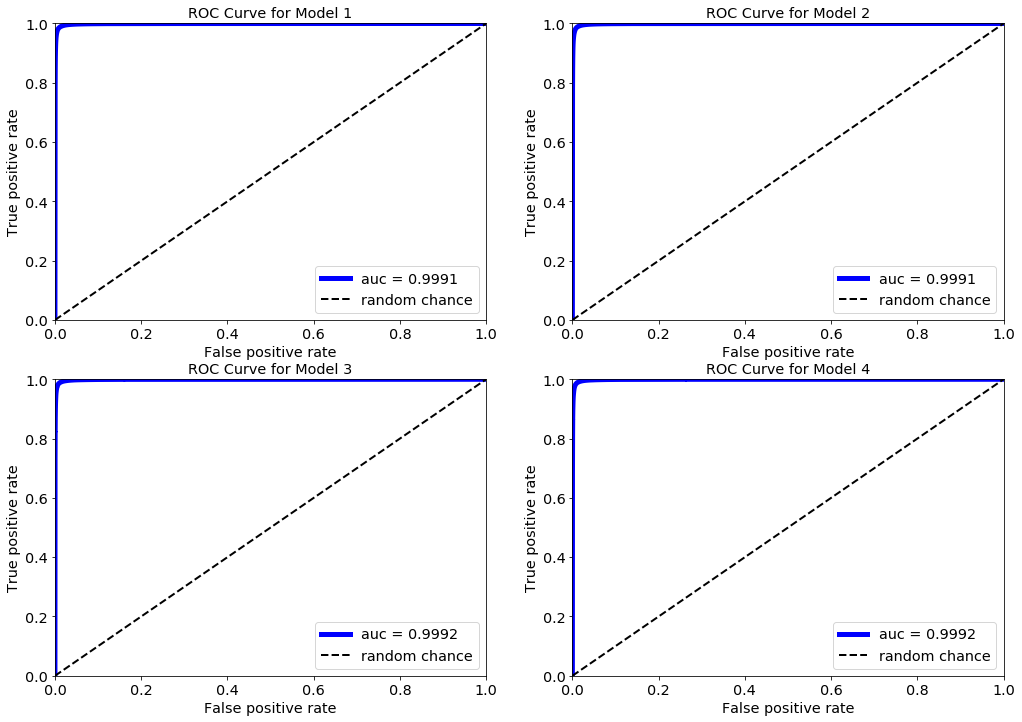

In [13]:
# Plot ROC for Signal ID
x=[0, 1]
y=[0, 1]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17,12))
fig.subplots_adjust(wspace =0.2)
axs=axs.flatten()
    
for i in range(len(axs)):
    if i==0:
        fpr = fpr1
        tpr = tpr1
        roc_auc=roc_auc1
    elif i==1:
        fpr = fpr2
        tpr = tpr2
        roc_auc=roc_auc2
    elif i==2:
        fpr = fpr3
        tpr = tpr3
        roc_auc=roc_auc3
    else:
        fpr = fpr4
        tpr = tpr4
        roc_auc=roc_auc4
    axs[i].plot(fpr, tpr, lw=5, color='b', label='auc = %.4f' % (roc_auc))
    axs[i].plot(x, y, linestyle='--', lw=2, color='k', label='random chance')
    axs[i].set_xlim([0, 1.0])
    axs[i].set_ylim([0, 1.0])
    axs[i].set_xlabel('False positive rate')
    axs[i].set_ylabel('True positive rate')
    axs[i].set_title('ROC Curve for Model {}'.format(i+1))
    axs[i].legend(loc="lower right")
plt.show()

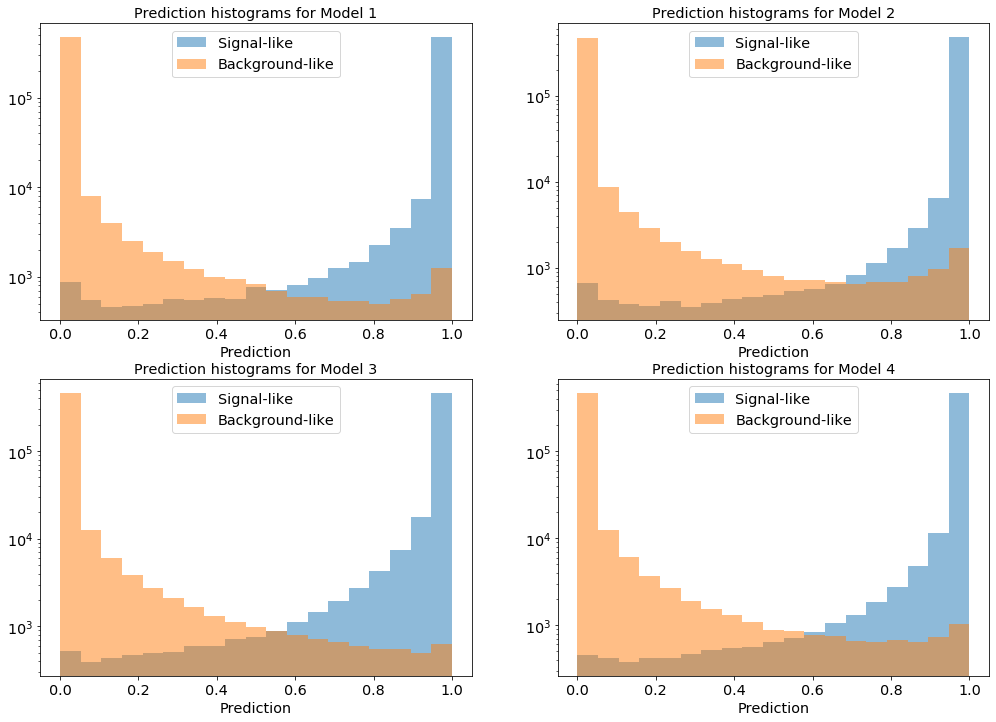

In [14]:
bins = np.linspace(0, 1, 20)
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(17,12))
fig.subplots_adjust(wspace =0.2)
axs=axs.flatten()
    
for i in range(len(axs)):
    if i==0:
        sig = predict1[(data_test['labels'][:,1]==1)][:,1]
        bkg = predict1[(data_test['labels'][:,0]==1)][:,1]
    elif i==1:
        sig = predict2[(data_test['labels'][:,1]==1)][:,1]
        bkg = predict2[(data_test['labels'][:,0]==1)][:,1]
    elif i==2:
        sig = predict3[(data_test['labels'][:,1]==1)][:,1]
        bkg = predict3[(data_test['labels'][:,0]==1)][:,1]
    else:
        sig = predict4[(data_test['labels'][:,1]==1)][:,1]
        bkg = predict4[(data_test['labels'][:,0]==1)][:,1]
    axs[i].hist(sig, bins, alpha=0.5, label='Signal-like')
    axs[i].hist(bkg, bins, alpha=0.5, label='Background-like')
    axs[i].legend(loc="best")
    axs[i].set_xlabel('Prediction')
    axs[i].set_title('Prediction histograms for Model {}'.format(i+1))
    axs[i].set_yscale('log')
plt.show()

In [38]:
cut = 0.7

In [39]:
predict = 0.25*(predict1+predict2+predict3+predict4)

In [40]:
index1 = np.argwhere((data_test['labels'][:,1]==1)&(predict[:,1]>=cut)) # True Positive - correctly precited as Signal

index2 = np.argwhere((data_test['labels'][:,0]==1)&(predict[:,1]>=cut)) # False Positive - precited as Signal but is a Background image

index3 = np.argwhere((data_test['labels'][:,1]==1)&(predict[:,1]<cut)) # False Negative - precited as Background but is a Signal image

index4 = np.argwhere((data_test['labels'][:,0]==1)&(predict[:,1]<cut)) # True Negative - correctly precited as Background

# LRP

In [20]:
def GetRelevance(model, lrp_rule, data_image):
    '''Inputs: model_name - keras.model,
               lrp_rule - str, data - array of shape (n, 1,grid,grid,1)'''
    model_ws = iutils.keras.graph.model_wo_softmax(model)
    lrp_analyzer = innvestigate.create_analyzer(lrp_rule, model_ws)
    start = time.time()
    
    nElem = 20000
    batchsize = data_image.shape[0]
    slices = int(batchsize // nElem)
    size_from_loop = batchsize - (batchsize % nElem)

    print('Running LRP Analysis')
    print('Total Events: {0:0.0f}'.format(batchsize))
    print('Split into chunk size: {0:0.0f}'.format(nElem))
    print('Number of slices: ', slices)

    lrp = [lrp_analyzer.analyze([data_image[0:int(nElem)]])]
    for i in range(1, slices):
        if (i%5==0):
            print("... Running LRP on slice ",i)
        lrp_i = lrp_analyzer.analyze([data_image[int(nElem*i):int(nElem*(i+1))]])
        lrp.append(lrp_i)
        del lrp_i
        
    if((batchsize % nElem) > 0):
        print("... Running LRP on remaining elements ", batchsize % nElem)
        lrp.append(lrp_analyzer.analyze([data_image[size_from_loop:]]))
        slices = slices+1
    print(len(lrp))

    lrp_image =np.vstack([lrp[i] for i in range (slices)])
    print('time = ', time.time()-start, 's')
    return lrp_image

Uncomment the following 4 blocks to run and save LRP outputs for each model.

In [23]:
# pixel_relevance = GetRelevance(model1, 'lrp.sequential_preset_a', data_test['jetImages'])
# np.savez('data/LRP_image1', image = pixel_relevance )

Running LRP Analysis
Total Events: 1000000
Split into chunk size: 20000
Number of slices:  50
... Running LRP on slice  5
... Running LRP on slice  10
... Running LRP on slice  15
... Running LRP on slice  20
... Running LRP on slice  25
... Running LRP on slice  30
... Running LRP on slice  35
... Running LRP on slice  40
... Running LRP on slice  45
50
time =  562.8493654727936 s


In [24]:
# pixel_relevance2 = GetRelevance(model2, 'lrp.sequential_preset_a', data_test['jetImages'])
# np.savez('data/LRP_image2', image = pixel_relevance2 )

Running LRP Analysis
Total Events: 1000000
Split into chunk size: 20000
Number of slices:  50
... Running LRP on slice  5
... Running LRP on slice  10
... Running LRP on slice  15
... Running LRP on slice  20
... Running LRP on slice  25
... Running LRP on slice  30
... Running LRP on slice  35
... Running LRP on slice  40
... Running LRP on slice  45
50
time =  548.2107717990875 s


In [25]:
# pixel_relevance3 = GetRelevance(model3, 'lrp.sequential_preset_a', data_test['jetImages'])
# np.savez('data/LRP_image3', image = pixel_relevance3 )

Running LRP Analysis
Total Events: 1000000
Split into chunk size: 20000
Number of slices:  50
... Running LRP on slice  5
... Running LRP on slice  10
... Running LRP on slice  15
... Running LRP on slice  20
... Running LRP on slice  25
... Running LRP on slice  30
... Running LRP on slice  35
... Running LRP on slice  40
... Running LRP on slice  45
50
time =  542.4115946292877 s


In [26]:
# pixel_relevance4 = GetRelevance(model4, 'lrp.sequential_preset_a', data_test['jetImages'])
# np.savez('data/LRP_image4', image = pixel_relevance4 )

Running LRP Analysis
Total Events: 1000000
Split into chunk size: 20000
Number of slices:  50
... Running LRP on slice  5
... Running LRP on slice  10
... Running LRP on slice  15
... Running LRP on slice  20
... Running LRP on slice  25
... Running LRP on slice  30
... Running LRP on slice  35
... Running LRP on slice  40
... Running LRP on slice  45
50
time =  540.0901024341583 s


Loading LRP scores for each model and normalising the relevance for each event to be b/w [-1,1]. For each event, we find the maximum absolute relevance and divide the relevances for ech pixel by that max value.

In [27]:
pixel_relevance = np.load('data/LRP_image1.npz')['image']
pixel_relevance2 = np.load('data/LRP_image2.npz')['image']
pixel_relevance3 = np.load('data/LRP_image3.npz')['image']
pixel_relevance4 = np.load('data/LRP_image4.npz')['image']

In [29]:
pixel_relevance = np.asarray(pixel_relevance).reshape(len(pixel_relevance),16,16,1)
pixel_relevance2 = np.asarray(pixel_relevance2).reshape(len(pixel_relevance2),16,16,1)
pixel_relevance3 = np.asarray(pixel_relevance3).reshape(len(pixel_relevance3),16,16,1)
pixel_relevance4 = np.asarray(pixel_relevance4).reshape(len(pixel_relevance4),16,16,1)

In [30]:
norm_relevance1 = np.where(np.repeat(np.max(np.abs(pixel_relevance),axis = (1,2)),16*16).reshape(pixel_relevance.shape) >0,
                                (pixel_relevance/np.repeat(np.max(np.abs(pixel_relevance),axis = (1,2)),16*16).reshape(pixel_relevance.shape)),
                                0)
norm_relevance2 = np.where(np.repeat(np.max(np.abs(pixel_relevance2),axis = (1,2)),16*16).reshape(pixel_relevance2.shape) >0,
                                (pixel_relevance2/np.repeat(np.max(np.abs(pixel_relevance2),axis = (1,2)),16*16).reshape(pixel_relevance2.shape)),
                                0)
norm_relevance3 = np.where(np.repeat(np.max(np.abs(pixel_relevance3),axis = (1,2)),16*16).reshape(pixel_relevance3.shape) >0,
                                (pixel_relevance3/np.repeat(np.max(np.abs(pixel_relevance3),axis = (1,2)),16*16).reshape(pixel_relevance3.shape)),
                                0)
norm_relevance4 = np.where(np.repeat(np.max(np.abs(pixel_relevance4),axis = (1,2)),16*16).reshape(pixel_relevance4.shape) >0,
                                (pixel_relevance4/np.repeat(np.max(np.abs(pixel_relevance4),axis = (1,2)),16*16).reshape(pixel_relevance4.shape)),
                                0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [32]:
norm_relevance = 0.25*(norm_relevance1+norm_relevance2+ norm_relevance3+ norm_relevance4)

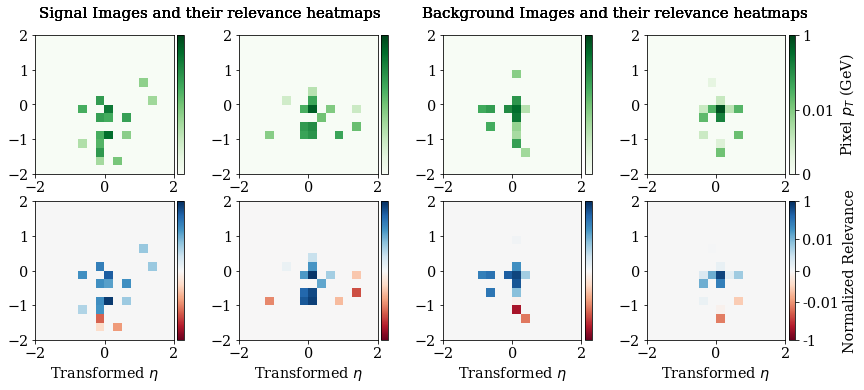

In [36]:
plt.rc('font', family='serif')
fig, axs = plt.subplots(2,4, figsize=(14, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .2, wspace=.2)
fig.subplots_adjust(top=0.83)   
axs = axs.ravel()
for i in range(4):
    if (i==0 or i==1): #signal
        im1 = axs[i].imshow(data_test['jetImages'].squeeze()[data_test['labels'][:,1]==1][i+19].squeeze(), interpolation='nearest', origin='low',
                            cmap='Greens',norm=SymLogNorm(linthresh=0.001), vmin =0.0 , vmax = 1.0, extent=[-2,2,-2,2])

        im2 = axs[i+4].imshow(norm_relevance.squeeze()[data_test['labels'][:,1]==1][i+19].squeeze(), interpolation='nearest', origin='low',
                        cmap='RdBu', norm=SymLogNorm(linthresh=0.001), vmin = -1, vmax= 1, extent=[-2,2,-2,2])

    else: #bkg
        im1 = axs[i].imshow(data_test['jetImages'].squeeze()[data_test['labels'][:,0]==1][i+15].squeeze(), interpolation='nearest', origin='low',
                            cmap='Greens',norm=SymLogNorm(linthresh=0.001), vmin =0.0 , vmax = 1, extent=[-2,2,-2,2])

        im2 = axs[i+4].imshow(norm_relevance.squeeze()[data_test['labels'][:,0]==1][i+15].squeeze(), interpolation='nearest', origin='low',
                        cmap='RdBu', norm=SymLogNorm(linthresh=0.001), vmin = -1, vmax= 1, extent=[-2,2,-2,2])
    #cbar = fig.colorbar(im1, ax=axs[i], fraction=0.0467, pad=0.02)
    #cbar.set_ticks([])
    #cbar = fig.colorbar(im2, ax=axs[i+4], fraction=0.0467, pad=0.02)
    #cbar.set_ticks([])
    axs[i+4].set_xlabel(r'Transformed $\eta$')
    cbar1 = fig.colorbar(im1, ax=axs[i], fraction=0.0467, pad=0.02)
    cbar2 = fig.colorbar(im2, ax=axs[i+4], fraction=0.0467, pad=0.02)
    if (i==3):
        cbar1.set_label(r'Pixel $p_T$ (GeV)')
        cbar2.set_label(r'Normalized Relevance')
        cbar_ticks = np.array([-1,-0.01,0,0.01,1])
        cbar_tick_labels = np.array(['-1','-0.01','0','0.01','1'])
        cbar_mask = np.where((cbar_ticks >= 0.) & (cbar_ticks <= 1.))
        cbar1.set_ticks(cbar_ticks[cbar_mask])
        cbar1.ax.set_yticklabels(cbar_tick_labels[cbar_mask])
        #cbar_ticks_neg = np.concatenate((np.linspace(-0.001,10.005,2), np.linspace(-0.01,-0.05,2), np.linspace(-0.1,-0.5,2), np.linspace(-1,-10,10)) )
        cbar_mask2 = np.where((cbar_ticks >= -1.) & (cbar_ticks <= 1.))
        cbar2.set_ticks(cbar_ticks[cbar_mask2])
        cbar2.ax.set_yticklabels(cbar_tick_labels[cbar_mask2])
        #cbar2.set_ticks([-1., -0.01, 0, 0.01, 1.])
    else:
        cbar1.set_ticks([])
        cbar2.set_ticks([])
    plt.figtext(0.318,0.88,"Signal Images and their relevance heatmaps", va="center", ha="center", size=15)
    plt.figtext(0.72,0.88,"Background Images and their relevance heatmaps", va="center", ha="center", size=15)
    plt.savefig('Toy_sig-bkg_image_and_heatmap.png', bbox_inches='tight')

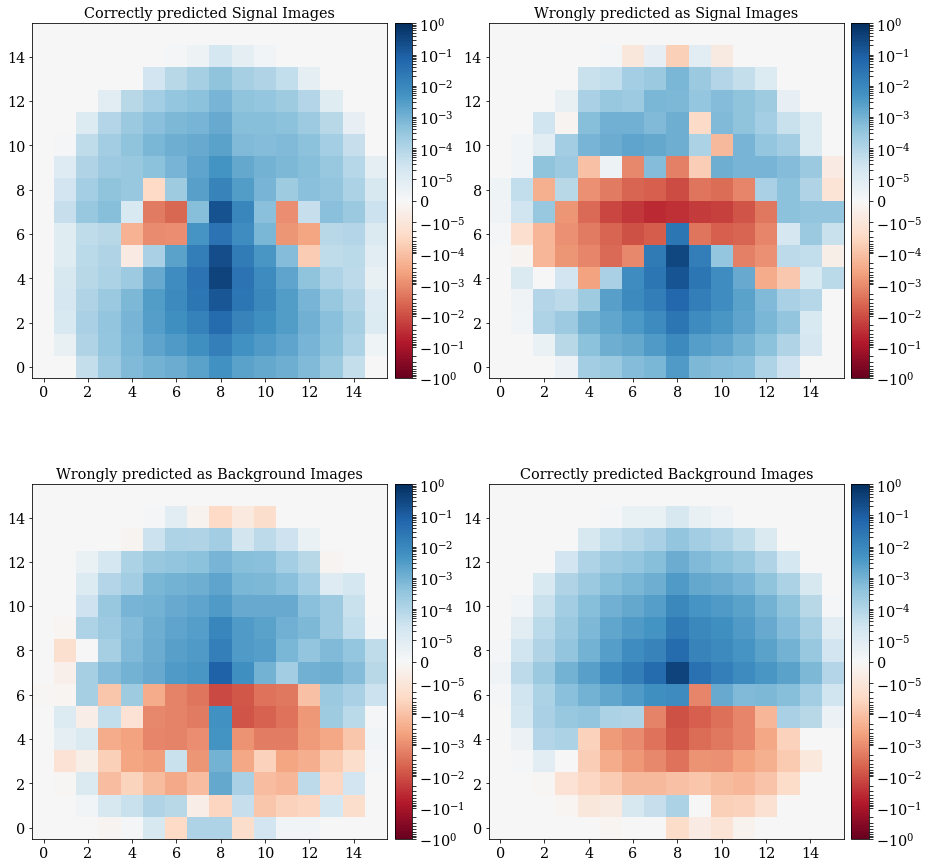

In [41]:
fig, _axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.3, wspace =0.2)
axs=_axs.flatten()

im =axs[0].imshow(np.mean(norm_relevance[index1], axis=0).squeeze(), cmap='RdBu',interpolation='nearest',
                norm=SymLogNorm(linthresh=0.00001), vmin = -1, vmax= 1, origin='low')
axs[0].set_title("Correctly predicted Signal Images")
fig.colorbar(im, ax=axs[0], fraction=0.0467, pad=0.02)

im =axs[1].imshow(np.mean(norm_relevance[index2], axis=0).squeeze(), cmap='RdBu',interpolation='nearest',
                norm=SymLogNorm(linthresh=0.00001), vmin = -1, vmax= 1, origin='low')
axs[1].set_title("Wrongly predicted as Signal Images")
fig.colorbar(im, ax=axs[1], fraction=0.0467, pad=0.02)

im =axs[2].imshow(np.mean(norm_relevance[index3], axis=0).squeeze(), cmap='RdBu',interpolation='nearest',
                norm=SymLogNorm(linthresh=0.00001), vmin = -1, vmax= 1, origin='low')
axs[2].set_title("Wrongly predicted as Background Images")
fig.colorbar(im, ax=axs[2], fraction=0.0467, pad=0.02)

im =axs[3].imshow(np.mean(norm_relevance[index4], axis=0).squeeze(), cmap='RdBu', interpolation='nearest',
                norm=SymLogNorm(linthresh=0.00001), vmin = -1, vmax= 1, origin='low')
axs[3].set_title("Correctly predicted Background Images")
fig.colorbar(im, ax=axs[3], fraction=0.0467, pad=0.02)

plt.show()